In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
X,y = make_regression(n_samples=10000, n_features=20, n_informative=20, noise=10, random_state=1)

u = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-u)/std

In [3]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
X.shape, y.shape

((10000, 21), (10000,))

In [4]:
m = X.shape[0]

def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    return e/m

def gradient(X,y,theta):
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_-y))
    m = X.shape[0]
    return grad/m

def gradDescent(X,y,learning_rate=0.01, max_epochs=300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
            
    return theta,error_list

In [11]:
def batch_gradDescent(X,y,batch_size=200, learning_rate=0.01, max_epochs=10):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    data = np.hstack((X,y.reshape(-1,1))) # To Shuffle
    
    for i in range(max_epochs):
        # Mini Batch Gradient Descent
        # Faster & more Robust Convergence, Noisy Updates help to avoid local minima,
        # Vectorization, which is not in SGD, No need to load entire data in memory.
        # batch_size = 1 -> Stochastic Gradient Descent (SGD)
        np.random.shuffle(data)
        m = data.shape[0]
        total_batches = m//batch_size
        
        for i in range(total_batches):
            batch_data = data[i*batch_size : (i+1)*batch_size,:]
            x_batch = batch_data[:,:-1]
            y_batch = batch_data[:,-1]
            
            batch_gradient = gradient(x_batch, y_batch, theta)
            theta = theta - learning_rate*batch_gradient
            
            e = error(x_batch,y_batch,theta)
            error_list.append(e)
            
    return theta,error_list

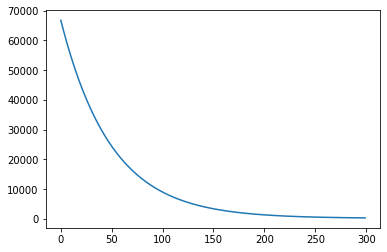

In [12]:
theta,error_list = gradDescent(X,y)
plt.figure()
plt.plot(np.arange(len(error_list)), error_list)
plt.show()

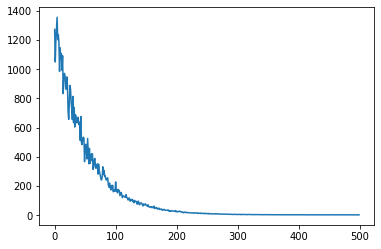

In [13]:
theta,error_list = batch_gradDescent(X,y)
plt.figure()
plt.plot(np.arange(len(error_list)), error_list)
plt.show()